# Deep Latent Policy Gradient for Ant

In [1]:
import gym,warnings,time
warnings.filterwarnings("ignore") # Stop annoying warnings
gym.logger.set_level(40)
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
import matplotlib.pyplot as plt
%matplotlib inline
import skvideo.io
from datetime import datetime
from custom_ant import AntEnvCustom # Custom ant 
from lgrp_class import lgrp_class # Gaussian random path
from vae_class import vae_class # VAE
from antTrainEnv_class import antTrainEnv_class
from util import PID_class,display_frames_as_gif,\
    quaternion_to_euler_angle,multi_dim_interp,cpu_sess,gpu_sess,Scaler
print ("TF version is [%s]."%(tf.__version__))

TF version is [1.8.0].


### Instantiate Class

Custom Ant Environment made by SJ.


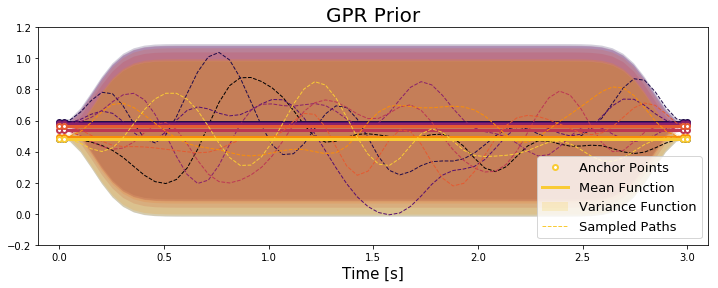

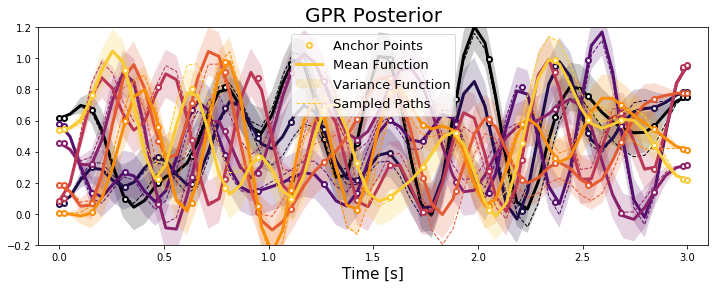

In [2]:
tf.reset_default_graph() # Reset Graph
AntEnv = antTrainEnv_class(_tMax=3,_nAnchor=20,_maxRepeat=3,_hypGain=1/4,_hypLen=1/4,_pGain=0.01,
            _zDim=16,_hDims=[64,64],_vaeActv=tf.nn.relu,
            _PLOT_GRP=True)

### Train Ant

In [3]:
SAVE_VID = False
MAKE_GIF = False # Probably unnecessary 
PLOT_GRP = True 
PLOT_EVERY = 10

Start training...
[0/500](#total:100) avgRwd:[-1.892] XdispMean:[-0.075] XdispVar:[1.395] absHdispMean:[91.1] priorProb:[0.50]
 rAvg:[-1.892] = (contact:-0.002+ctrl:-0.411+fwd:-0.020+heading:-2.460+survive:1.000)
    [GRP mean] avgRwd:[-0.011](-0.011=cntct:-0.00+ctrl:-0.48+fwd:0.12+hd:-0.65+srv:1.00) xD:[1.178] hD:[36.8]


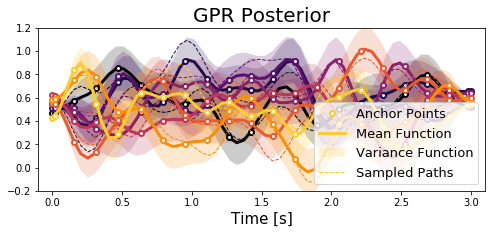

  [GRP-0] avgRwd:[-1.284](-1.284=cntct:-0.00+ctrl:-0.38+fwd:0.01+hd:-1.90+srv:1.00) xD:[0.066] hD:[-73.3]


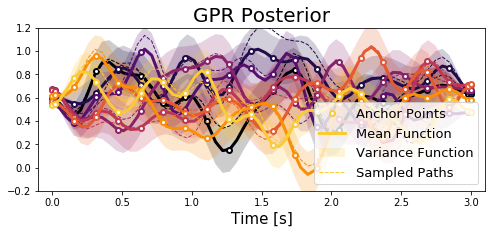

  [GRP-1] avgRwd:[0.035](0.035=cntct:-0.00+ctrl:-0.63+fwd:0.15+hd:-0.48+srv:1.00) xD:[1.936] hD:[-52.2]


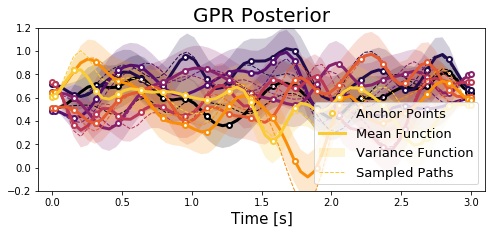

  [GRP-2] avgRwd:[0.642](0.642=cntct:-0.00+ctrl:-0.36+fwd:0.10+hd:-0.10+srv:1.00) xD:[0.944] hD:[31.1]
[1/500](#total:200) avgRwd:[-1.900] XdispMean:[0.182] XdispVar:[1.561] absHdispMean:[83.0] priorProb:[0.50]
 rAvg:[-1.900] = (contact:-0.002+ctrl:-0.467+fwd:0.002+heading:-2.434+survive:1.000)
[2/500](#total:300) avgRwd:[-1.135] XdispMean:[0.541] XdispVar:[1.903] absHdispMean:[69.4] priorProb:[0.50]
 rAvg:[-1.135] = (contact:-0.002+ctrl:-0.398+fwd:0.047+heading:-1.782+survive:1.000)
[3/500](#total:400) avgRwd:[-1.194] XdispMean:[0.273] XdispVar:[2.170] absHdispMean:[70.2] priorProb:[0.50]
 rAvg:[-1.194] = (contact:-0.002+ctrl:-0.359+fwd:0.020+heading:-1.853+survive:1.000)
[4/500](#total:500) avgRwd:[-1.337] XdispMean:[0.360] XdispVar:[1.432] absHdispMean:[76.8] priorProb:[0.50]
 rAvg:[-1.337] = (contact:-0.002+ctrl:-0.349+fwd:0.028+heading:-2.014+survive:1.000)
[5/500](#total:600) avgRwd:[-1.014] XdispMean:[-0.019] XdispVar:[1.640] absHdispMean:[67.2] priorProb:[0.50]
 rAvg:[-1.014] =

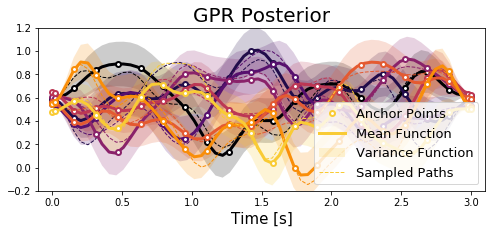

  [GRP-0] avgRwd:[-0.750](-0.750=cntct:-0.00+ctrl:-0.29+fwd:-0.04+hd:-1.42+srv:1.00) xD:[-0.381] hD:[-92.2]


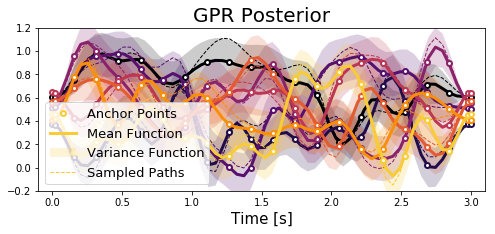

  [GRP-1] avgRwd:[-3.506](-3.506=cntct:-0.00+ctrl:-0.48+fwd:-0.02+hd:-4.00+srv:1.00) xD:[-0.216] hD:[-160.4]


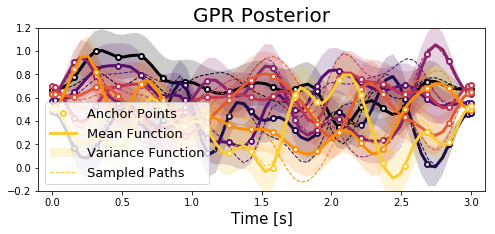

  [GRP-2] avgRwd:[-4.499](-4.499=cntct:-0.00+ctrl:-0.38+fwd:0.16+hd:-5.28+srv:1.00) xD:[1.566] hD:[9.4]
[11/500](#total:1200) avgRwd:[-2.262] XdispMean:[-0.045] XdispVar:[1.149] absHdispMean:[83.1] priorProb:[0.50]
 rAvg:[-2.262] = (contact:-0.002+ctrl:-0.404+fwd:-0.014+heading:-2.842+survive:1.000)
[12/500](#total:1300) avgRwd:[-1.515] XdispMean:[-0.486] XdispVar:[2.183] absHdispMean:[80.5] priorProb:[0.50]
 rAvg:[-1.515] = (contact:-0.002+ctrl:-0.390+fwd:-0.063+heading:-2.060+survive:1.000)
[13/500](#total:1400) avgRwd:[-1.682] XdispMean:[-0.286] XdispVar:[1.579] absHdispMean:[84.5] priorProb:[0.50]
 rAvg:[-1.682] = (contact:-0.002+ctrl:-0.400+fwd:-0.043+heading:-2.237+survive:1.000)
[14/500](#total:1500) avgRwd:[-1.650] XdispMean:[-0.200] XdispVar:[1.667] absHdispMean:[85.1] priorProb:[0.50]
 rAvg:[-1.650] = (contact:-0.002+ctrl:-0.440+fwd:-0.035+heading:-2.173+survive:1.000)
[15/500](#total:1600) avgRwd:[-1.395] XdispMean:[0.037] XdispVar:[1.244] absHdispMean:[78.8] priorProb:[0.50

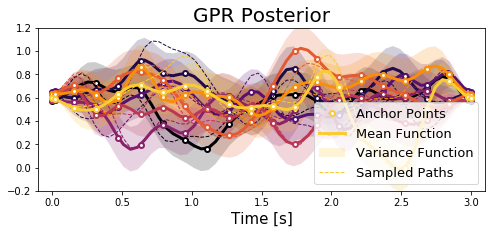

  [GRP-0] avgRwd:[0.758](0.758=cntct:-0.00+ctrl:-0.25+fwd:0.18+hd:-0.16+srv:1.00) xD:[1.607] hD:[23.6]


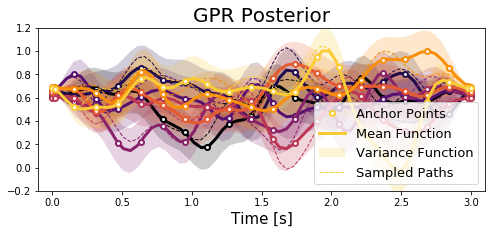

  [GRP-1] avgRwd:[0.705](0.705=cntct:-0.00+ctrl:-0.25+fwd:0.15+hd:-0.20+srv:1.00) xD:[1.359] hD:[-12.1]


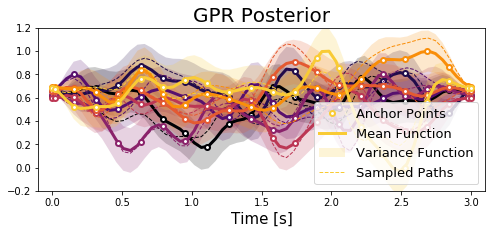

  [GRP-2] avgRwd:[0.501](0.501=cntct:-0.00+ctrl:-0.25+fwd:0.17+hd:-0.43+srv:1.00) xD:[1.584] hD:[-22.9]
[21/500](#total:2200) avgRwd:[-1.282] XdispMean:[0.484] XdispVar:[1.540] absHdispMean:[75.1] priorProb:[0.50]
 rAvg:[-1.282] = (contact:-0.002+ctrl:-0.351+fwd:0.043+heading:-1.972+survive:1.000)
[22/500](#total:2300) avgRwd:[-0.918] XdispMean:[0.478] XdispVar:[1.942] absHdispMean:[72.9] priorProb:[0.50]
 rAvg:[-0.918] = (contact:-0.002+ctrl:-0.350+fwd:0.042+heading:-1.608+survive:1.000)


In [ ]:
sess = gpu_sess()
maxEpoch  = 500
batchSize = 100
print ("Start training...")
AntEnv.train_dlpg(_sess=sess,_seed=0,_maxEpoch=maxEpoch,_batchSize=batchSize,_nIter4update=1e4,
                 _SAVE_VID=SAVE_VID,_MAKE_GIF=MAKE_GIF,_PLOT_GRP=PLOT_GRP,_PLOT_EVERY=PLOT_EVERY,
                 _DO_RENDER=False)

### Make Final vid

In [ ]:
SAVE_VID_FINAL = False
MAKE_GIF_FINAL = False
PLOT_GRP_FINAL = True

In [ ]:
for _i in range(3):
    np.random.seed(seed=_i+100)
    sampledX = AntEnv.VAE.sample(_sess=sess).reshape((AntEnv.nAnchor,AntEnv.env.actDim))
    sampledX = (sampledX-sampledX.min())/(sampledX.max()-sampledX.min())
    AntEnv.set_anchor_grp_posterior(_anchors=sampledX,_levBtw=0.99)
    avgRwd,ret = AntEnv.unit_rollout_from_grp_mean(_maxRepeat=AntEnv.maxRepeat,_DO_RENDER=True)
    print ("  [^] avgRwd:[%.3f] Xdisp:[%.3f] Hdisp:[%.3f]"%(avgRwd,ret['xDisp'],ret['hDisp']))
    if SAVE_VID_FINAL:
        outputdata = np.asarray(ret['frames']).astype(np.uint8)
        vidName = 'vids/ant_dlpg_final_%d.mp4'%(_i)
        skvideo.io.vwrite(vidName,outputdata)
        print ("[%s] saved."%(vidName))
    if MAKE_GIF_FINAL:
        display_frames_as_gif(ret['frames'],_intv_ms=20,_figsize=(6,6),_fontsize=15,
                              _titleStrs=ret['titleStrs'])
    if PLOT_GRP_FINAL:
        AntEnv.GRPposterior.plot_all(_nPath=10,_figsize=(10,4))